# Figure 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
from PIL import Image

sys.path.append('./')
sys.path.append('../..') 
from consensus_variables import * 
from load_data_f3 import *
from plot_f3 import *

In [3]:
n = 4
plots_general_config["yxlabel_fontsize"] = 8.5+n
plots_general_config["yxticks_fontsize"] = 8+n
plots_general_config["title_fontsize"] = 9.5+n
plots_general_config["legend_fontsize"] = 6+n

In [ ]:
# paths
mutrate_file = os.path.join(deepcsa_run_dir, "mutrate/all_mutrates.tsv")

omega_dir = os.path.join(deepcsa_run_dir, "omegagloballoc")

regressions_mutrate_dir = regressions_omega_dir = os.path.join(origin_dir, "projects/bladder_ts/results/complete_cohort/regressions/refined_final_regressions/"
                            "20250522_FINALPAPER45DONORS_mutrate_omega_ForzeInterc_SelectedGenesPerMetric")
figures_dir = "figs/"

In [5]:
clinvars_df = pd.read_csv(clinvars_file, sep = "\t")
clinvars_df.loc[clinvars_df["AGE"] > 55, "AGE_above55"] = ">55"
clinvars_df.loc[clinvars_df["AGE"] < 55, "AGE_above55"] = "<55"
clinvars_df

,SAMPLE_ID,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,SMOKING_STATUS,HISTORY_OF_SMOKING,CURRENT_SMOKER,SMOKING_PACK_YEAR,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0047_BDO_01,P19_0047,UF-20-25,46,M,29.9,former,yes,no,NaN,...,4604.716364,12537.872222,8061.174839,10219.111423,7411.275842,10154.727518,8533.763889,1217.225989,7219.964358,<55
1,P19_0009_BTR_01,P19_0009,A150,56,F,32.8,current,yes,yes,NaN,...,20081.660000,22902.629630,3906.232083,9616.333567,3643.054758,19295.271583,2809.628472,2877.779661,8327.585211,>55
2,P19_0008_BDO_01,P19_0008,A149,72,M,28.3,former,yes,no,NaN,...,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383,>55
3,P19_0001_BTR_01,P19_0001,A133,24,M,30.1,never,no,no,0.0,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
4,P19_0041_BDO_01,P19_0041,20-47,59,F,52.7,never,no,no,0.0,...,2385.021818,5453.885185,5192.524296,4991.056762,5017.462665,4003.279676,5407.927083,1000.299435,4480.454219,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,P19_0051_BTR_01,P19_0051,NaN,79,M,35.0,former,yes,no,NaN,...,3423.169091,6183.216667,11250.679166,8946.863350,8309.846559,4375.084532,10197.385417,2199.564972,7265.051577,>55
75,P19_0052_BDO_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,6724.989091,9597.907407,10454.000666,10035.801682,8557.754319,6531.122302,9640.461806,5426.531073,9069.061127,<55
76,P19_0052_BTR_01,P19_0052,NaN,31,F,44.5,current,yes,yes,NaN,...,4098.137273,4993.168519,5390.901930,5905.169587,4274.387116,4220.028777,4882.638889,2633.853107,4992.780493,<55
77,P19_0053_BDO_01,P19_0053,NaN,72,M,19.5,former,yes,no,NaN,...,3214.100000,5951.287037,11580.210783,8484.175193,8225.657394,3842.708633,10380.493056,2003.457627,7172.570262,>55


In [6]:
mutrate_df = pd.read_csv(mutrate_file, sep = "\t")
mutrate_df = mutrate_df.loc[mutrate_df["MUTTYPES"] == "SNV"][["SAMPLE_ID", "GENE", "REGIONS", "MUTTYPES", "MUTRATE_MB"]]
mutrate_df = mutrate_df.merge(clinvars_df, on = "SAMPLE_ID", how = "inner")
mutrate_df["GENE"] = mutrate_df["GENE"].replace({"ALL_GENES": "total"}) # change for the merging with the regressions df
mutrate_df

,SAMPLE_ID,GENE,REGIONS,MUTTYPES,MUTRATE_MB,SUBJECT_ID,BANK_ID,AGE,SEX,BMI,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,P19_0042_BDO_01,total,protein_affecting,SNV,2.247730,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
1,P19_0042_BDO_01,ARID1A,protein_affecting,SNV,1.131693,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
2,P19_0042_BDO_01,BMP2K,protein_affecting,SNV,0.000000,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
3,P19_0042_BDO_01,CDKN1A,protein_affecting,SNV,2.989433,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
4,P19_0042_BDO_01,CREBBP,protein_affecting,SNV,1.431757,P19_0042,20-51,86,M,36.5,...,24863.533636,27872.485185,5078.097848,6027.944639,5723.397950,16315.818345,5003.013889,996.548023,7899.841569,>55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,P19_0001_BTR_01,STAG2,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13584,P19_0001_BTR_01,TERT,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13585,P19_0001_BTR_01,TERTpromoter,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55
13586,P19_0001_BTR_01,TP53,synonymous,SNV,0.000000,P19_0001,A133,24,M,30.1,...,2180.124545,7210.483333,7638.135789,6367.466713,5440.150512,3755.018885,6841.708333,490.768362,5105.737962,<55


In [7]:
omega_df = load_omega_res(omega_dir)
omega_df = omega_df.merge(clinvars_df, left_on = "sample", right_on = "SAMPLE_ID", how = "inner")
omega_df

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
0,CREBBP--24_ENST00000262367_ENSE00003544267,P19_0036_BTR_01,missense,1,20.199219,0.042709,1.151065,89.440552,P19_0036_BTR_01,P19_0036,...,2251.838182,2815.072222,1056.649212,1399.589348,1101.556662,1676.714029,1068.086806,1351.011299,1340.180173,<55
1,CREBBP--24_ENST00000262367_ENSE00003544267,P19_0036_BTR_01,nonsynonymous_splice,1,19.336719,0.044807,1.102908,85.683765,P19_0036_BTR_01,P19_0036,...,2251.838182,2815.072222,1056.649212,1399.589348,1101.556662,1676.714029,1068.086806,1351.011299,1340.180173,<55
2,CREBBP,P19_0036_BTR_01,missense,2,1.275195,0.742182,0.212011,3.961352,P19_0036_BTR_01,P19_0036,...,2251.838182,2815.072222,1056.649212,1399.589348,1101.556662,1676.714029,1068.086806,1351.011299,1340.180173,<55
3,CREBBP,P19_0036_BTR_01,nonsynonymous_splice,2,1.196777,0.805105,0.198911,3.720581,P19_0036_BTR_01,P19_0036,...,2251.838182,2815.072222,1056.649212,1399.589348,1101.556662,1676.714029,1068.086806,1351.011299,1340.180173,<55
4,CDKN1A--3_ENST00000244741_ENSE00001952853,P19_0036_BTR_01,missense,1,30.250012,0.027197,1.720967,134.607922,P19_0036_BTR_01,P19_0036,...,2251.838182,2815.072222,1056.649212,1399.589348,1101.556662,1676.714029,1068.086806,1351.011299,1340.180173,<55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57280,KDM6A--20_ENST00000611820_ENSE00001664216,P19_0015_BTR_01,essential_splice,1,294.149219,0.002218,16.661253,1328.534595,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55
57281,KDM6A--20_ENST00000611820_ENSE00001664216,P19_0015_BTR_01,truncating,1,112.375000,0.006341,6.379567,504.022339,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55
57282,KDM6A--20_ENST00000611820_ENSE00001664216,P19_0015_BTR_01,essential_splice_plus,1,199.375000,0.003382,11.314326,893.970337,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55
57283,KDM6A--20_ENST00000611820_ENSE00001664216,P19_0015_BTR_01,truncating_plus,1,94.959375,0.007620,5.399582,424.593774,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55


## Fig3A

In [8]:
gene_order = gene_order_sexbias

In [9]:
omega_excess_df = omega_df.loc[
                            (omega_df["sample"].isin(all_sample_names_dirty)) &
                            (omega_df["gene"].isin(gene_order)) &
                            (omega_df["impact"].isin(["missense", "truncating"]))]

# calculate excess of SNVs
omega_excess_df["excess"] = (omega_excess_df["dnds"] - 1) / omega_excess_df["dnds"]
display(omega_excess_df.loc[(omega_excess_df["sample"].str.contains("P19_0026")) & 
                            (omega_excess_df["gene"] == "KMT2D")])

display(omega_excess_df.loc[(omega_excess_df["sample"].str.contains("P19_0026")) & 
                            (omega_excess_df["gene"] == "KMT2D")][["gene", "impact", "dnds", "excess"]])

omega_excess_df["excess"] = omega_excess_df["excess"].apply(lambda x : max(0, x))
display(omega_excess_df.loc[(omega_excess_df["sample"].str.contains("P19_0026")) & 
                            (omega_excess_df["gene"] == "KMT2D")][["gene", "impact", "dnds", "excess"]])

omega_excess_df["excess_muts"] = (omega_excess_df["excess"] * omega_excess_df["mutations"]).apply(np.floor)
display(omega_excess_df.loc[(omega_excess_df["sample"].str.contains("P19_0026")) & 
                            (omega_excess_df["gene"] == "KMT2D")][["gene", "impact", "dnds", "excess", "excess_muts"]])

omega_excess_df = omega_excess_df.groupby(by = ['gene', 'sample'])['excess_muts'].sum().astype(int).reset_index()

omega_excess_df['CLEAN_SAMPLE_ID'] = omega_excess_df['sample'].map(old2new_sample_names)
omega_excess_df['SINGLE_SAMPLE'] = omega_excess_df['CLEAN_SAMPLE_ID'].isin(single_sample_per_donor)
omega_excess_df['DONOR'] = omega_excess_df['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])

omega_excess_df = omega_excess_df.groupby(by = ['DONOR', 'gene'])['excess_muts'].sum().reset_index()
omega_excess_df = omega_excess_df.rename({"excess_muts": "DRIVERS", "gene": "GENE"}, axis = 1)

omega_excess_df["GENE"] = omega_excess_df["GENE"] + "_SNV"

omega_excess_df

/tmp/ipykernel_977889/1667142746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_excess_df["excess"] = (omega_excess_df["dnds"] - 1) / omega_excess_df["dnds"]


,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55,excess
30938,KMT2D,P19_0026_BDO_01,missense,80,2.163269,0.0,1.685933,2.739441,P19_0026_BDO_01,P19_0026,...,10616.692593,7522.142223,7447.680448,6628.011127,5330.234712,6794.968750,895.401130,5897.073550,>55,0.537737
30942,KMT2D,P19_0026_BDO_01,truncating,176,34.650012,0.0,28.060397,42.622424,P19_0026_BDO_01,P19_0026,...,10616.692593,7522.142223,7447.680448,6628.011127,5330.234712,6794.968750,895.401130,5897.073550,>55,0.971140
42714,KMT2D,P19_0026_BTR_01,missense,78,3.291797,0.0,2.552271,4.189624,P19_0026_BTR_01,P19_0026,...,7711.266667,7737.782117,7475.367905,6534.382430,5477.657374,7326.649306,1058.220339,5740.349893,>55,0.696215
42718,KMT2D,P19_0026_BTR_01,truncating,170,49.048438,0.0,39.329195,60.982642,P19_0026_BTR_01,P19_0026,...,7711.266667,7737.782117,7475.367905,6534.382430,5477.657374,7326.649306,1058.220339,5740.349893,>55,0.979612


,gene,impact,dnds,excess
30938,KMT2D,missense,2.163269,0.537737
30942,KMT2D,truncating,34.650012,0.971140
42714,KMT2D,missense,3.291797,0.696215
42718,KMT2D,truncating,49.048438,0.979612


/tmp/ipykernel_977889/1667142746.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_excess_df["excess"] = omega_excess_df["excess"].apply(lambda x : max(0, x))


,gene,impact,dnds,excess
30938,KMT2D,missense,2.163269,0.537737
30942,KMT2D,truncating,34.650012,0.971140
42714,KMT2D,missense,3.291797,0.696215
42718,KMT2D,truncating,49.048438,0.979612


/tmp/ipykernel_977889/1667142746.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_excess_df["excess_muts"] = (omega_excess_df["excess"] * omega_excess_df["mutations"]).apply(np.floor)


,gene,impact,dnds,excess,excess_muts
30938,KMT2D,missense,2.163269,0.537737,43.0
30942,KMT2D,truncating,34.650012,0.971140,170.0
42714,KMT2D,missense,3.291797,0.696215,54.0
42718,KMT2D,truncating,49.048438,0.979612,166.0


,DONOR,GENE,DRIVERS
0,01,ARID1A_SNV,35
1,01,CDKN1A_SNV,2
2,01,CREBBP_SNV,1
3,01,EP300_SNV,5
4,01,KDM6A_SNV,25
...,...,...,...
561,53,NOTCH2_SNV,57
562,53,RB1_SNV,5
563,53,RBM10_SNV,87
564,53,STAG2_SNV,0


In [10]:
indels_df = pd.read_csv(mutrate_file, sep = "\t")
indels_df = indels_df.loc[(indels_df["MUTTYPES"] == "DELETION-INSERTION") &
                        (indels_df["REGIONS"] == "protein_affecting") &
                        (indels_df["GENE"].isin(gene_order)) &
                        (indels_df["SAMPLE_ID"].isin(all_sample_names_dirty))][["SAMPLE_ID", "GENE", "N_MUTS"]]

indels_df['CLEAN_SAMPLE_ID'] = indels_df['SAMPLE_ID'].map(old2new_sample_names)
indels_df['DONOR'] = indels_df['CLEAN_SAMPLE_ID'].apply(lambda x : x[:2])
indels_df['SINGLE_SAMPLE'] = indels_df['CLEAN_SAMPLE_ID'].isin(single_sample_per_donor)

indels_df = indels_df.groupby(by = ['DONOR', 'GENE'])['N_MUTS'].sum().reset_index()
indels_df = indels_df.rename({"N_MUTS": "DRIVERS"}, axis = 1)

indels_df["GENE"] = indels_df["GENE"] + "_indel"

indels_df

,DONOR,GENE,DRIVERS
0,01,ARID1A_indel,28.0
1,01,CDKN1A_indel,13.0
2,01,CREBBP_indel,7.0
3,01,EP300_indel,4.0
4,01,FOXQ1_indel,0.0
...,...,...,...
580,53,NOTCH2_indel,13.0
581,53,RB1_indel,3.0
582,53,RBM10_indel,35.0
583,53,STAG2_indel,2.0


In [11]:
# saved in consensus_variables.py
# clinvars_df['DONOR'] = clinvars_df['SUBJECT_ID'].apply(lambda x : x[-2:])
# females_ageordered = clinvars_df.loc[clinvars_df["SEX"] == "F"].sort_values(by = "AGE")["DONOR"].unique().tolist()
# print(females_ageordered)
# males_ageordered = clinvars_df.loc[clinvars_df["SEX"] == "M"].sort_values(by = "AGE")["DONOR"].unique().tolist()
# males_ageordered

In [12]:
excessnvs_indels_df = pd.concat([omega_excess_df, indels_df])

# excessnvs_indels_males_df = excessnvs_indels_df.loc[excessnvs_indels_df["DONOR"].isin(males_age_ordered)]
# excessnvs_indels_males_df = excessnvs_indels_males_df.pivot(
#     columns = 'DONOR', index = 'GENE', values = 'DRIVERS').fillna(0).astype(int)
# excessnvs_indels_males_df = excessnvs_indels_males_df[males_age_ordered]
# display(excessnvs_indels_males_df)

# excessnvs_indels_females_df = excessnvs_indels_df.loc[excessnvs_indels_df["DONOR"].isin(females_age_ordered)]
# excessnvs_indels_females_df = excessnvs_indels_females_df.pivot(
#     columns = 'DONOR', index = 'GENE', values = 'DRIVERS').fillna(0).astype(int)
# excessnvs_indels_females_df = excessnvs_indels_females_df[females_age_ordered]
# excessnvs_indels_females_df

excessnvs_indels_df = excessnvs_indels_df.pivot(
    columns = 'DONOR', index = 'GENE', values = 'DRIVERS').fillna(0).astype(int)
excessnvs_indels_df

DONOR,01,02,03,04,05,06,07,08,09,11,...,42,43,45,46,47,48,50,51,52,53
GENE,,,,,,,,,,,,,,,,,,,,,
ARID1A_SNV,35,90,11,83,13,0,39,81,22,81,...,30,0,26,32,63,13,134,261,1,62
ARID1A_indel,28,64,12,102,18,4,36,95,9,84,...,38,6,26,28,45,22,144,264,2,67
CDKN1A_SNV,2,0,1,27,9,0,0,5,8,3,...,37,1,7,24,7,4,6,1,0,1
CDKN1A_indel,13,5,8,110,30,0,4,49,4,12,...,109,6,20,88,40,1,19,1,3,12
CREBBP_SNV,1,48,31,12,9,21,7,61,143,22,...,55,5,19,26,2,22,42,39,22,21
CREBBP_indel,7,19,13,11,2,6,8,23,46,15,...,29,0,4,14,3,9,7,9,4,4
EP300_SNV,5,89,48,34,22,12,21,91,79,26,...,83,12,10,36,8,39,48,62,43,48
EP300_indel,4,35,12,12,10,11,15,18,17,13,...,23,7,1,16,5,14,28,23,11,35
FOXQ1_SNV,0,6,4,17,0,0,2,0,0,2,...,116,0,1,33,1,0,27,5,0,6


In [13]:
gene_order_edit = []
for gene in gene_order:
    gene_order_edit.append(f"{gene}_SNV")
    gene_order_edit.append(f"{gene}_indel")

gene_order_edit

['RBM10_SNV',
 'RBM10_indel',
 'CDKN1A_SNV',
 'CDKN1A_indel',
 'ARID1A_SNV',
 'ARID1A_indel',
 'STAG2_SNV',
 'STAG2_indel',
 'KDM6A_SNV',
 'KDM6A_indel',
 'KMT2D_SNV',
 'KMT2D_indel',
 'TP53_SNV',
 'TP53_indel',
 'CREBBP_SNV',
 'CREBBP_indel',
 'EP300_SNV',
 'EP300_indel',
 'NOTCH2_SNV',
 'NOTCH2_indel',
 'KMT2C_SNV',
 'KMT2C_indel',
 'RB1_SNV',
 'RB1_indel',
 'FOXQ1_SNV',
 'FOXQ1_indel']

In [29]:
donors_2samples = clinvars_df.groupby("SUBJECT_ID").size().to_frame(name = "nsamples")
donors_2samples = donors_2samples.loc[donors_2samples["nsamples"] > 1].reset_index()
donors_2samples = donors_2samples["SUBJECT_ID"].tolist()
len(donors_2samples)

34

/home/rblanco/projects/normal_bladder_paper/main/Fig3/plot_f3.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


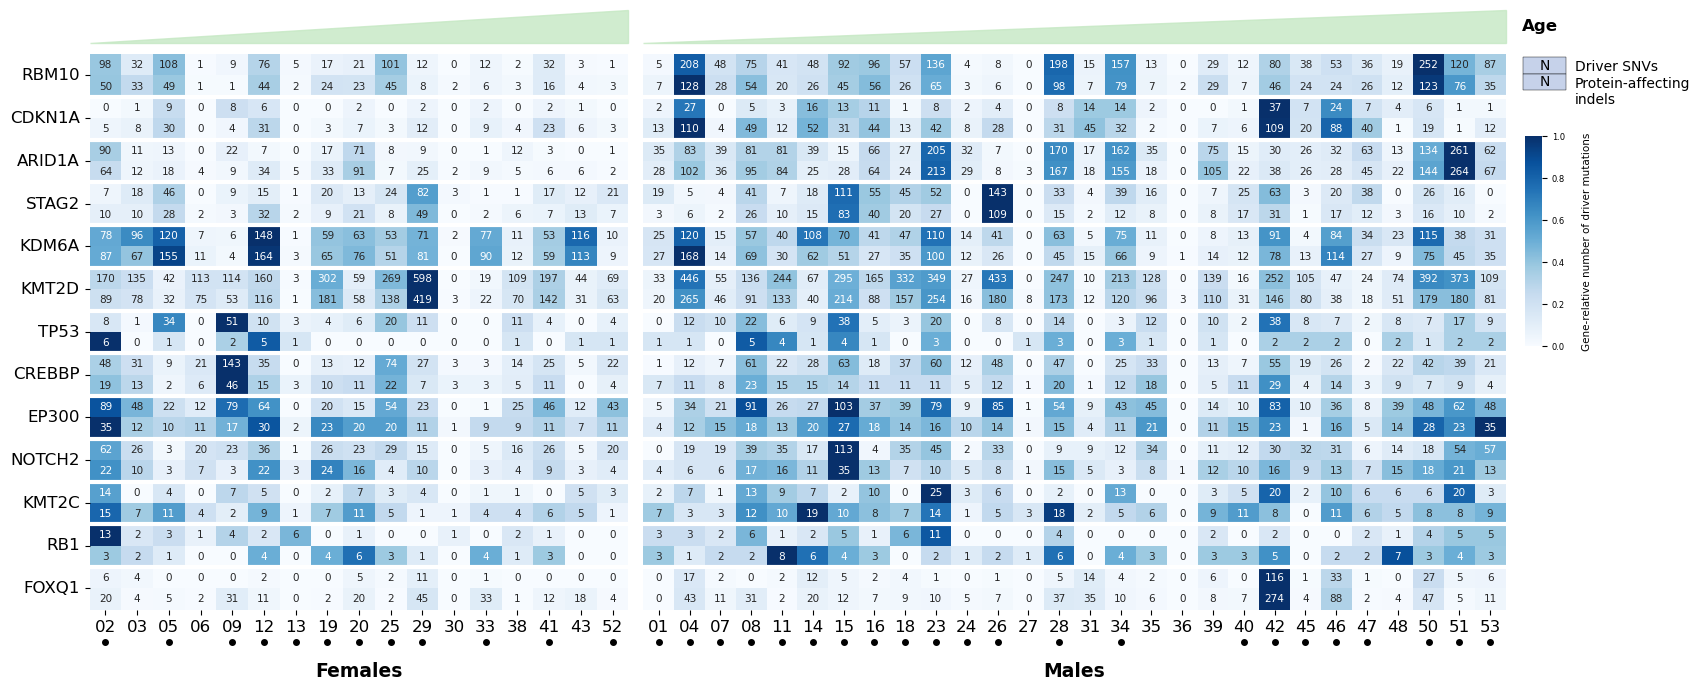

In [37]:
heatmap_config = {"h1_subset": females_age_ordered,
                "h2_subset": males_age_ordered,
                "duplicated_samples": [d.split("_")[1][2:] for d in donors_2samples],
                "h1_title": "\nFemales",
                "h2_title": "\nMales",
                "title_fontsize": 13.5,
                "genes_order": gene_order_edit,
                "width_ratios": [1.25, 2],
                "cmap": "Blues", 
                "cmap_label": "\nGene-relative number of driver mutations",
                "cmap_label_fontsize": 7.5,
                "cmap_ticks_fontsize": 6,
                "cmap_orient": "vertical",
                "cmap_loc": [0.9, 0.5, 0.01, 0.3], # [left, bottom, width, height]
                "rows2separate": [i for i in range(2, len(gene_order_edit), 2)],
                "annot_fontsize": 7.5,
                "xyticks_fontsize": 12,
                "figsize": (17, 7)}

plot_double_heatmap(excessnvs_indels_df, heatmap_config, os.path.join(figures_dir, "fig3a.png"))

## Fig3B

In [15]:
regions = ["protein_affecting", "non_protein_affecting"]
mutrate_PA_NPA_allgenes_df = mutrate_df.loc[(mutrate_df["REGIONS"].isin(regions)) &
                                            (mutrate_df["GENE"] == "total")]
mutrate_PA_NPA_allgenes_df["REGIONS"] = mutrate_PA_NPA_allgenes_df["REGIONS"].replace({"protein_affecting": "Protein affecting",
                                                                                       "non_protein_affecting": "Non-protein affecting"})
mutrate_PA_NPA_allgenes_df = mutrate_PA_NPA_allgenes_df[["AGE", "REGIONS", "MUTRATE_MB"]].reset_index(drop = True)
mutrate_PA_NPA_allgenes_df.columns = ["AGE", "response", "mutrate"]
mutrate_PA_NPA_allgenes_df

/tmp/ipykernel_3438775/2747608626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutrate_PA_NPA_allgenes_df["REGIONS"] = mutrate_PA_NPA_allgenes_df["REGIONS"].replace({"protein_affecting": "Protein affecting",


,AGE,response,mutrate
0,86,Protein affecting,2.247730
1,86,Non-protein affecting,0.508076
2,41,Non-protein affecting,0.279052
3,41,Protein affecting,0.555674
4,51,Protein affecting,0.180103
...,...,...,...
153,81,Protein affecting,1.108834
154,46,Non-protein affecting,0.596588
155,46,Protein affecting,1.444551
156,24,Protein affecting,0.436868


In [16]:
regr_mutrate_PA_age_df = load_lmem_pred(clinvar = "age_decades", 
                                        res_dir = regressions_mutrate_dir,
                                        metric = "mutrate.proteinaffecting",
                                        obsdata_df = mutrate_df[["SAMPLE_ID", "GENE", "AGE"]].drop_duplicates())
regr_mutrate_PA_allgenes_age_df = regr_mutrate_PA_age_df.loc[regr_mutrate_PA_age_df["gene"] == "total"].reset_index(drop = True)
regr_mutrate_PA_allgenes_age_df["response"] = "Protein affecting"

regr_mutrate_NPA_age_df = load_lmem_pred(clinvar = "age_decades", 
                                        res_dir = regressions_mutrate_dir,
                                        metric = "mutrate.nonproteinaffecting",
                                        obsdata_df = mutrate_df[["SAMPLE_ID", "GENE", "AGE"]].drop_duplicates())
regr_mutrate_NPA_allgenes_age_df = regr_mutrate_NPA_age_df.loc[regr_mutrate_NPA_age_df["gene"] == "total"].reset_index(drop = True)
regr_mutrate_NPA_allgenes_age_df["response"] = "Non-protein affecting"


regr_mutrate_PA_NPA_allgenes_age_df = pd.concat([regr_mutrate_PA_allgenes_age_df, regr_mutrate_NPA_allgenes_age_df]).reset_index(drop = True) # 62 points because we have 31 different ages
regr_mutrate_PA_NPA_allgenes_age_df

/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'age_decades_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'age_decades_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(


,gene,intercept,coeff,qval,lowci,highci,age_decades,predicted,AGE,response
0,total,0,0.200829,1.020267e-11,0.146742,0.254916,8.6,1.727128,86.0,Protein affecting
1,total,0,0.200829,1.020267e-11,0.146742,0.254916,4.1,0.823398,41.0,Protein affecting
2,total,0,0.200829,1.020267e-11,0.146742,0.254916,5.1,1.024227,51.0,Protein affecting
3,total,0,0.200829,1.020267e-11,0.146742,0.254916,5.6,1.124641,56.0,Protein affecting
4,total,0,0.200829,1.020267e-11,0.146742,0.254916,6.0,1.204973,60.0,Protein affecting
...,...,...,...,...,...,...,...,...,...,...
57,total,0,0.037904,1.829995e-04,0.020392,0.055416,3.2,0.121293,32.0,Non-protein affecting
58,total,0,0.037904,1.829995e-04,0.020392,0.055416,8.0,0.303232,80.0,Non-protein affecting
59,total,0,0.037904,1.829995e-04,0.020392,0.055416,7.5,0.284280,75.0,Non-protein affecting
60,total,0,0.037904,1.829995e-04,0.020392,0.055416,6.5,0.246376,65.0,Non-protein affecting


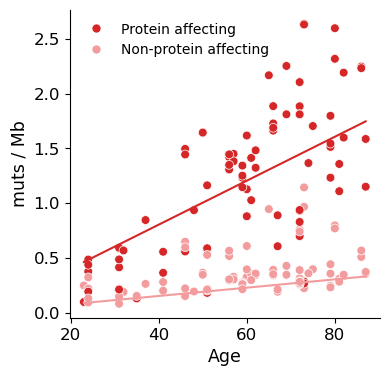

In [17]:
plot_config = {}
plot_config["plot1"] = {}
plot_config["plot1"]["Protein affecting"] = plots_general_config["dot_colorabove_coeffplot"]
plot_config["plot1"]["Non-protein affecting"] = plots_general_config["dot_colorbelow_coeffplot"]
plot_config2 = {"title": "",
               "ylabel": "muts / Mb",
               "xlabel": "Age", 
               "figsize": (4, 4)}
plots_general_config_v = plots_general_config.copy()
plots_general_config_v["dot_size_scplot"] = 40
regr_res_scatterplot(metric = "mutrate",
                     clinvar = "AGE",
                     data_df = mutrate_PA_NPA_allgenes_df, 
                     regrres_df = regr_mutrate_PA_NPA_allgenes_age_df,
                     plot_config = plot_config,
                     plot_config2 = plot_config2,
                     plots_general_config = plots_general_config_v,
                     save_file = os.path.join(figures_dir, "fig3b.png"),
                     add_legend = True)

## Fig3C

In [18]:
regr_mutrate_PA_age_df_simple = regr_mutrate_PA_age_df.drop(["age_decades", "predicted", "AGE"], axis = 1).drop_duplicates()
display(regr_mutrate_PA_age_df_simple)
regr_mutrate_NPA_age_df_simple = regr_mutrate_NPA_age_df.drop(["age_decades", "predicted", "AGE"], axis = 1).drop_duplicates()
# regr_mutrate_NPA_age_df_simple

,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0,0.139055,1.854446e-01,0.001601,0.276510
79,CDKN1A,0,0.190057,8.790049e-03,0.074471,0.305643
158,CREBBP,0,0.129286,4.281052e-04,0.068221,0.190350
237,EP300,0,0.124464,6.875729e-04,0.065227,0.183701
316,FOXQ1,0,0.210631,2.690303e-02,0.063974,0.357288
395,KDM6A,0,0.328438,2.226118e-03,0.152796,0.504081
474,KMT2C,0,0.047375,7.322626e-03,0.019214,0.075535
553,KMT2D,0,0.309193,2.683063e-10,0.222355,0.396031
632,NOTCH2,0,0.108659,1.301188e-04,0.061690,0.155629
711,RB1,0,0.031576,1.343594e-02,0.011464,0.051688


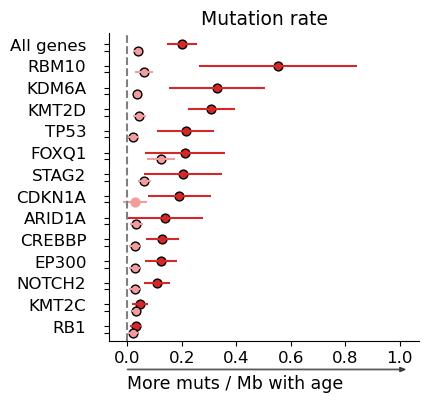

In [ ]:
significant_genes_PA = list(regr_mutrate_PA_age_df_simple.loc[(regr_mutrate_PA_age_df_simple["qval"] < 0.2) &
                        (regr_mutrate_PA_age_df_simple["gene"] != "total")].sort_values(
                        by = "coeff", ascending = True)["gene"].values)
significant_genes_PA.append("total")

plot_config = {"title": "Mutation density",
                # "ylabels": ["protein-affecting       ", "non-protein-affecting"],
                "ylabels": ["", ""],
                "ylabels_gene_xcoord": -0.15,
                "arrow_xlim": 1,
                "arrow_yloc": -2,
                "arrow_head_width": 0.2,
                "arrow_head_length": 0.02,
                "effectsize_text": "More muts / Mb with age",
                "effectsize_text_loc": 0,
                "effectsize_text_yloc": -2.9,
                "sign_threshold": 0.2,
                "null_effect": 0, 
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.15}
plots_general_config_v = plots_general_config.copy()
plots_general_config_v["dot_size_coeffplot"] = 40
plots_general_config_v["dot_edgewidth_coeffplot"] = 1
regr_res_coeffplot(regrres_df = regr_mutrate_PA_age_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config_v,
                   responses = significant_genes_PA, 
                   save_file = os.path.join(figures_dir, "fig3c_mutrate.png"),
                   regrres2compare_df = regr_mutrate_NPA_age_df_simple,
                   figsize = (4, 4), write_coeff = False)


In [20]:
regr_omega_age_df_simple = load_lmem_pred(clinvar = "age_decades", 
                                     res_dir = regressions_omega_dir,
                                     metric = "omega",
                                     obsdata_df = None
                                    )
regr_omegatrunc_age_df_simple = regr_omega_age_df_simple.loc[~(regr_omega_age_df_simple["gene"].str.contains("missense"))]
regr_omegatrunc_age_df_simple["gene"] = regr_omegatrunc_age_df_simple["gene"].str.split('_').str[0]
display(regr_omegatrunc_age_df_simple)

regr_omegamiss_age_df_simple = regr_omega_age_df_simple.loc[~regr_omega_age_df_simple["gene"].str.contains("truncating")]
regr_omegamiss_age_df_simple["gene"] = regr_omegamiss_age_df_simple["gene"].str.split('_').str[0]
regr_omegamiss_age_df_simple

/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'age_decades_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/tmp/ipykernel_3438775/1908578360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omegatrunc_age_df_simple["gene"] = regr_omegatrunc_age_df_simple["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
1,ARID1A,0,1.258634,0.302185,-0.253211,2.770480
3,CDKN1A,0,1.360467,0.370850,-0.529234,3.250169
5,CREBBP,0,1.083177,0.037477,0.292594,1.873760
7,EP300,0,0.892777,0.015490,0.316955,1.468598
10,KDM6A,0,5.711787,0.002826,2.659318,8.764256
12,KMT2C,0,0.448818,0.002342,0.213327,0.684308
14,KMT2D,0,5.043649,0.000001,3.290780,6.796518
16,NOTCH2,0,0.875682,0.034303,0.246166,1.505197
19,RBM10,0,7.097071,0.001473,3.527779,10.666364
21,STAG2,0,1.462816,0.400551,-0.722815,3.648446


/tmp/ipykernel_3438775/1908578360.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omegamiss_age_df_simple["gene"] = regr_omegamiss_age_df_simple["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0,0.165078,1.223040e-05,0.101733,0.228424
2,CDKN1A,0,0.249775,1.267880e-01,0.023598,0.475951
4,CREBBP,0,0.361675,4.806121e-04,0.194458,0.528891
6,EP300,0,0.255273,6.835189e-02,0.050440,0.460105
8,FOXQ1,0,0.367475,2.339955e-03,0.175797,0.559154
9,KDM6A,0,0.470116,3.528849e-04,0.257910,0.682322
11,KMT2C,0,0.126193,3.605667e-03,0.056530,0.195855
13,KMT2D,0,0.271197,1.631911e-08,0.188842,0.353552
15,NOTCH2,0,0.316635,3.605667e-03,0.142458,0.490812
17,RB1,0,0.222892,8.466508e-03,0.088732,0.357052


/home/rblanco/micromamba/envs/projects/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


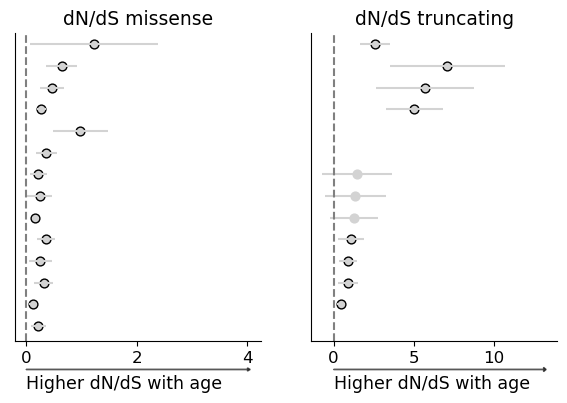

In [21]:
plot_config = {"title": ["dN/dS missense", "dN/dS truncating"],
                "arrow_xlim": [4, 13.1],
                "arrow_yloc": [ -2, -2],
                "arrow_head_width": [ 0.15, 0.2],
                "arrow_head_length": [ 0.05, 0.16],
                "effectsize_text": [
                                    "Higher dN/dS with age",
                                    "Higher dN/dS with age"],
                "effectsize_text_loc": [-0.001, -0.001],
                "effectsize_text_yloc": [-2.9, -2.9],
                "sign_threshold": 0.2,
                "null_effect": 0, 
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.15}
plots_general_config_v = plots_general_config.copy()
plots_general_config_v["dot_size_coeffplot"] = 40
plots_general_config_v["dot_edgewidth_coeffplot"] = 1
regrres_df_dict = {
                   "dndsmiss": regr_omegamiss_age_df_simple.set_index("gene").reindex(significant_genes_PA).reset_index(),
                   "dndstrunc": regr_omegatrunc_age_df_simple.set_index("gene").reindex(significant_genes_PA).reset_index()}
regr_res_coeffplot_multi(regrres_df_dict = regrres_df_dict, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config_v,
                   responses = significant_genes_PA, 
                   save_file = os.path.join(figures_dir, "fig3c_omega.png"),
                   regrres2compare_df = None,
                   figsize = (7, 4), remove_ylabels = True, write_coeff = False)

## Fig3D

In [22]:
omegatrunc_sexgenes_df = omega_df.loc[(omega_df["impact"] == "truncating") & (omega_df["gene"].isin(["RBM10", "STAG2", "ARID1A", "CDKN1A"]))]
omegamiss_tp53_df = omega_df.loc[(omega_df["impact"] == "missense") & (omega_df["gene"].isin(["TP53", "CDKN1A"]))]
omega_sex_df = pd.concat([omegatrunc_sexgenes_df, omegamiss_tp53_df])
omega_sex_df

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
123,RBM10,P19_0027_BTR_01,truncating,1,3.143750,0.336442,0.179082,13.970166,P19_0027_BTR_01,P19_0027,...,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816,<55
137,STAG2,P19_0027_BTR_01,truncating,1,2.706641,0.393225,0.154181,11.991919,P19_0027_BTR_01,P19_0027,...,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816,<55
334,STAG2,P19_0030_BTR_01,truncating,1,1.998438,0.535528,0.113888,8.884424,P19_0030_BTR_01,P19_0030,...,1954.958182,5193.600000,7599.328822,5985.858444,5268.269693,2620.681655,7048.027778,824.627119,5381.176768,<55
553,STAG2,P19_0013_BTR_01,truncating,1,2.218359,0.482065,0.126456,9.833716,P19_0013_BTR_01,P19_0013,...,1620.313636,4136.350000,4643.565565,3830.855641,4031.235139,2247.937050,4765.697917,353.288136,3516.711544,>55
693,ARID1A,P19_0001_BDO_01,truncating,5,17.893359,0.000011,6.348965,39.230029,P19_0001_BDO_01,P19_0001,...,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969,<55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54338,TP53,P19_0008_BDO_01,missense,11,3.591406,0.000494,1.855788,6.192725,P19_0008_BDO_01,P19_0008,...,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383,>55
55257,CDKN1A,P19_0023_BTR_01,missense,3,1.175000,0.787034,0.291580,3.060986,P19_0023_BTR_01,P19_0023,...,1841.948182,6765.479630,7502.203461,6009.289418,7160.063836,4154.763489,7279.694444,1109.062147,5270.467559,>55
55365,TP53,P19_0023_BTR_01,missense,11,3.865625,0.000263,1.998057,6.666528,P19_0023_BTR_01,P19_0023,...,1841.948182,6765.479630,7502.203461,6009.289418,7160.063836,4154.763489,7279.694444,1109.062147,5270.467559,>55
56432,CDKN1A,P19_0015_BTR_01,missense,8,4.437549,0.000763,2.015152,8.357227,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55


In [23]:
omega_sex_df.loc[(omega_sex_df["gene"] == "CDKN1A") & (omega_sex_df["impact"] == "missense"), "gene"] = "CDKN1Am"
omega_sex_df.loc[(omega_sex_df["gene"] == "CDKN1A") & (omega_sex_df["impact"] == "truncating"), "gene"] = "CDKN1At"
omega_sex_df

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,SAMPLE_ID,SUBJECT_ID,...,FOXQ1_depth,CDKN1A_depth,KMT2C_depth,TP53_depth,RB1_depth,FGFR3_depth,PIK3CA_depth,TERTpromoter_depth,total_depth,AGE_above55
123,RBM10,P19_0027_BTR_01,truncating,1,3.143750,0.336442,0.179082,13.970166,P19_0027_BTR_01,P19_0027,...,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816,<55
137,STAG2,P19_0027_BTR_01,truncating,1,2.706641,0.393225,0.154181,11.991919,P19_0027_BTR_01,P19_0027,...,2780.910909,5874.001852,9210.138451,7649.496146,6527.541728,3212.111511,8643.628472,1486.937853,5851.600816,<55
334,STAG2,P19_0030_BTR_01,truncating,1,1.998438,0.535528,0.113888,8.884424,P19_0030_BTR_01,P19_0030,...,1954.958182,5193.600000,7599.328822,5985.858444,5268.269693,2620.681655,7048.027778,824.627119,5381.176768,<55
553,STAG2,P19_0013_BTR_01,truncating,1,2.218359,0.482065,0.126456,9.833716,P19_0013_BTR_01,P19_0013,...,1620.313636,4136.350000,4643.565565,3830.855641,4031.235139,2247.937050,4765.697917,353.288136,3516.711544,>55
693,ARID1A,P19_0001_BDO_01,truncating,5,17.893359,0.000011,6.348965,39.230029,P19_0001_BDO_01,P19_0001,...,1896.860909,6262.712963,7333.893499,5549.427470,5669.664422,3126.193345,6644.104167,337.807910,4692.917969,<55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54338,TP53,P19_0008_BDO_01,missense,11,3.591406,0.000494,1.855788,6.192725,P19_0008_BDO_01,P19_0008,...,2035.886364,4938.668519,6636.928112,5494.578136,4971.831625,2959.359712,5894.118056,1441.333333,4372.224383,>55
55257,CDKN1Am,P19_0023_BTR_01,missense,3,1.175000,0.787034,0.291580,3.060986,P19_0023_BTR_01,P19_0023,...,1841.948182,6765.479630,7502.203461,6009.289418,7160.063836,4154.763489,7279.694444,1109.062147,5270.467559,>55
55365,TP53,P19_0023_BTR_01,missense,11,3.865625,0.000263,1.998057,6.666528,P19_0023_BTR_01,P19_0023,...,1841.948182,6765.479630,7502.203461,6009.289418,7160.063836,4154.763489,7279.694444,1109.062147,5270.467559,>55
56432,CDKN1Am,P19_0015_BTR_01,missense,8,4.437549,0.000763,2.015152,8.357227,P19_0015_BTR_01,P19_0015,...,2856.843636,8421.853704,5931.067673,6233.985985,4800.709224,7578.359712,5705.850694,1144.700565,4940.460606,>55


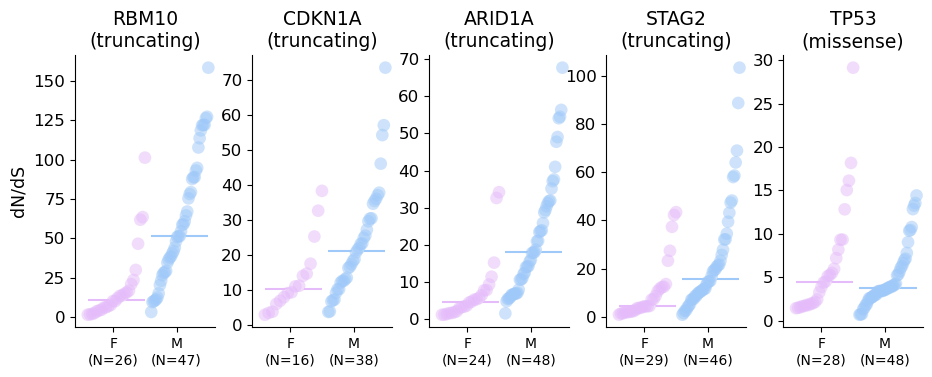

In [24]:
# genes_sex = ["RBM10", "CDKN1A", "ARID1A", "STAG2", "EP300"]
genes_sex = {"RBM10": "RBM10\n(truncating)", 
             "CDKN1At": "CDKN1A\n(truncating)",
             # "CDKN1Am": "CDKN1A\n(missense)",
             "ARID1A": "ARID1A\n(truncating)",
             "STAG2": "STAG2\n(truncating)", 
             # "EP300": "EP300\n(truncating)",
             "TP53": "TP53\n(missense)"}
clinvar = "SEX"
metric = "dnds"
plot_config = {"ylabel": "dN/dS",
               "xlabel": "",
              "figsize": (3*5, 4),
              "grid_nrows": 17,
              "grid_ncols": 10*6,
              "titles": genes_sex,
              "dot_size": 40,
              "line_width": 1.5}

plot_sigmoids(os.path.join(figures_dir, "fig3e.png"),
              prepare_twin_plot_data(omega_sex_df, clinvar, genes_sex, clinvar2color[clinvar],metric).reset_index(drop = True),
              clinvar,
              list(genes_sex.keys()),
              clinvar2color[clinvar],
              plot_config,
              plots_general_config,
              mode='twin')

## Fig3E

In [25]:
regr_mutrate_PA_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_mutrate_dir,
                                     metric = "mutrate.proteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_NPA_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_mutrate_dir,
                                     metric = "mutrate.nonproteinaffecting",
                                     obsdata_df = None
                                    )
regr_mutrate_PA_sex_df_simple

/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(


,gene,intercept,coeff,qval,lowci,highci
0,ARID1A,0.0,0.448753,0.498155,-0.236430,1.133936
1,CDKN1A,0.0,0.835508,0.072951,0.144283,1.526732
2,CREBBP,0.0,-0.298947,0.333690,-0.645786,0.047892
3,EP300,0.0,-0.189939,0.635377,-0.526213,0.146335
4,FOXQ1,0.0,0.402302,0.679004,-0.476665,1.281268
5,KDM6A,0.0,0.434735,0.719844,-0.612623,1.482094
6,KMT2C,0.0,0.020496,0.869505,-0.139601,0.180593
7,KMT2D,0.0,-0.353772,0.463619,-0.871280,0.163737
8,NOTCH2,0.0,-0.130013,0.710834,-0.396866,0.136839
9,RB1,0.0,-0.051869,0.680397,-0.167185,0.063447


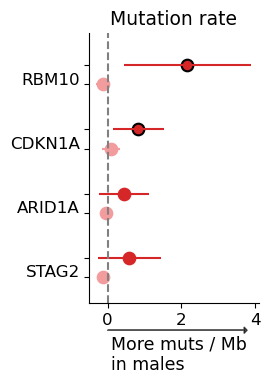

In [ ]:
sex_genes = ["STAG2", "ARID1A", "CDKN1A", "RBM10"]
plot_config = {"title": "Mutation density",
                # "ylabels": ["protein-affecting       ", "non-protein-affecting"],
                "ylabels": ["", ""],
                "ylabels_gene_xcoord": -0.75,
                "arrow_xlim": 3.7,
                "arrow_yloc": -1.13,
                "arrow_head_width": 0.1,
                "arrow_head_length": 0.08,
                "effectsize_text": "More muts / Mb\nin males",
                "effectsize_text_loc": 0.1,
                "effectsize_text_yloc": -1.75,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.1}
regr_res_coeffplot(regrres_df = regr_mutrate_PA_sex_df_simple, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = sex_genes, 
                   save_file = os.path.join(figures_dir, "fig3f_mutrate.png"),
                   regrres2compare_df = regr_mutrate_NPA_sex_df_simple,
                   figsize = (2.2, 3.5), write_coeff = False)

/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45/main/Fig3/load_data_f3.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'is_male_x'} in the result is deprecated and will raise a MergeError in a future version.
  res_df = interc_df[[clinvar]].merge(
/tmp/ipykernel_3438775/1406137613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_omega_sex_df_simple_trunc["gene"] = regr_omega_sex_df_simple_trunc["gene"].str.split('_').str[0]


,gene,intercept,coeff,qval,lowci,highci
1,ARID1A,0.0,19.034906,0.001070,9.764919,28.304893
3,CDKN1A,0.0,17.319926,0.004281,7.589893,27.049959
5,CREBBP,0.0,-4.186109,0.315042,-9.399100,1.026883
7,EP300,0.0,-1.888043,0.577670,-5.461330,1.685244
10,KDM6A,0.0,14.494173,0.312346,-3.299032,32.287378
12,KMT2C,0.0,1.238015,0.260457,-0.164165,2.640195
14,KMT2D,0.0,-8.495035,0.313195,-18.993443,2.003372
16,NOTCH2,0.0,-2.191469,0.568514,-5.926444,1.543506
19,RBM10,0.0,33.735190,0.009341,13.164492,54.305888
21,STAG2,0.0,10.135967,0.305899,-2.155700,22.427635


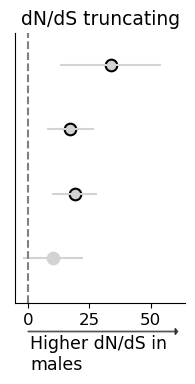

In [27]:
regr_omega_sex_df_simple = load_lmem_pred(clinvar = "is_male", 
                                     res_dir = regressions_omega_dir,
                                     metric = "omega",
                                     obsdata_df = None
                                    )
regr_omega_sex_df_simple_trunc = regr_omega_sex_df_simple.loc[(regr_omega_sex_df_simple["gene"].str.contains("truncating"))]
regr_omega_sex_df_simple_trunc["gene"] = regr_omega_sex_df_simple_trunc["gene"].str.split('_').str[0]
display(regr_omega_sex_df_simple_trunc)

sex_genes = ["STAG2", "ARID1A", "CDKN1A", "RBM10"]
plot_config = {"title": "dN/dS truncating",
                "ylabels_gene_xcoord": -0.65,
                "arrow_xlim": 60,
                "arrow_yloc": -1.15,
                "arrow_head_width": 0.1,
                "arrow_head_length": 1,
                "effectsize_text": "Higher dN/dS in\nmales",
                "effectsize_text_loc": 1,
                "effectsize_text_yloc": -1.75,
                "sign_threshold": 0.2,
                "null_effect": 0,
                "coeff_fontsize": 6,
                "writecoeff_offset" : 0.1}
regr_res_coeffplot(regrres_df = regr_omega_sex_df_simple_trunc, 
                   plot_config = plot_config,
                   plots_general_config = plots_general_config,
                   responses = sex_genes, 
                   save_file = os.path.join(figures_dir, "fig3f_omega_trunc.png"),
                   regrres2compare_df = None,
                   figsize = (2.2, 3.5), remove_ylabels = True, 
                   write_coeff = False, write_dndstype = False, add_arrow = True)

## Final figure

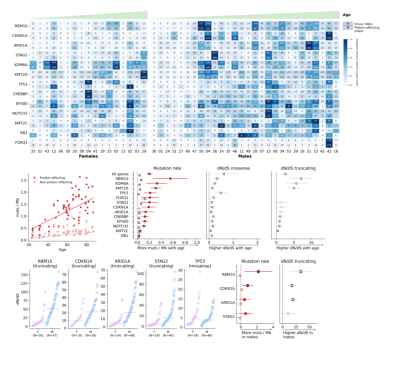

In [34]:
# load images
images_dict = {}
for img_file in os.listdir(figures_dir):
    if img_file.startswith("fig"):
        images_dict[img_file.split(".")[0]] = Image.open(os.path.join(figures_dir, img_file))
        
# height
fig_height = images_dict["fig3a"].height + images_dict["fig3c_mutrate"].height + images_dict["fig3f_omega"].height 

# width
fig_width = images_dict["fig3e"].width + images_dict["fig3f_mutrate"].width + images_dict["fig3f_omega"].width + 700

# create canvas
canvas = Image.new('RGB', (fig_width, fig_height), 'white')

# paste images
width = 0
height = 0

row1_figs = ["fig3a"]
for fig in row1_figs:
    canvas.paste(images_dict[fig], (width, height))
    
row2_figs = ["fig3b", "fig3c_mutrate", "fig3c_omega"]
for fig in row2_figs:
    if fig == "fig3b":
        width = 50
        height += images_dict["fig3a"].height + 150
    elif fig == "fig3c_mutrate":
        width += images_dict["fig3b"].width + 150
        height = images_dict["fig3a"].height + 50
    elif fig == "fig3c_omega":
        width += images_dict["fig3c_mutrate"].width
    canvas.paste(images_dict[fig], (width, height))

row3_figs = ["fig3e", "fig3f_mutrate", "fig3f_omega_trunc"]
width = 50
height += images_dict["fig3c_mutrate"].height + 70
for fig in row3_figs:
    canvas.paste(images_dict[fig], (width, height))
    width += images_dict[fig].width 

plt.imshow(canvas)
plt.axis('off')
canvas.save(os.path.join(figures_dir, "fig3.png"))
plt.show()